# Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [1]:
# Install TensorFlow and Keras
!pip install tensorflow
!pip install keras

In [2]:
# Load TensorFlow and Keras
import tensorflow as tf
import keras

In [3]:
# Print versions
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.15.0
Keras version: 2.15.0


# Q2. Load the Wine Quality dataset and explore its dimensions.

In [5]:
import pandas as pd

# Load the dataset
wine_quality_data = pd.read_csv("wine.csv")

# Display the dimensions of the dataset
print("Dimensions of the Wine Quality dataset:")
print("Number of rows:", wine_quality_data.shape[0])
print("Number of columns:", wine_quality_data.shape[1])

Dimensions of the Wine Quality dataset:
Number of rows: 1599
Number of columns: 12


# Q3. Check for null values, identify categorical variables, and encode them.

In [6]:
# Check for null values
print("Null values in the dataset:")
print(wine_quality_data.isnull().sum())

# Identify categorical variables
categorical_vars = wine_quality_data.select_dtypes(include=['object']).columns
print("\nCategorical variables in the dataset:")
print(categorical_vars)

# Encode categorical variables
wine_quality_data_encoded = pd.get_dummies(wine_quality_data, columns=categorical_vars)

# Display the encoded dataset
print("\nEncoded dataset:")
print(wine_quality_data_encoded.head())

Null values in the dataset:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Categorical variables in the dataset:
Index(['quality'], dtype='object')

Encoded dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0           

# Q4. Separate the features and target variables from the dataset.

In [8]:
# Separate features and target variable
X = wine_quality_data.drop(columns=['quality'])  # Features
y = wine_quality_data['quality']  # Target variable

# Q5. Perform a train-test split, dividing the data into training, validation, and test datasets.

In [9]:
from sklearn.model_selection import train_test_split

# Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training data into train and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Display the dimensions of each set
print("Dimensions of training set (X_train):", X_train.shape)
print("Dimensions of validation set (X_val):", X_val.shape)
print("Dimensions of test set (X_test):", X_test.shape)
print("Dimensions of training target variable (y_train):", y_train.shape)
print("Dimensions of validation target variable (y_val):", y_val.shape)
print("Dimensions of test target variable (y_test):", y_test.shape)

Dimensions of training set (X_train): (1023, 11)
Dimensions of validation set (X_val): (256, 11)
Dimensions of test set (X_test): (320, 11)
Dimensions of training target variable (y_train): (1023,)
Dimensions of validation target variable (y_val): (256,)
Dimensions of test target variable (y_test): (320,)


# Q6. Scale the dataset using an appropriate scaling technique.

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)
# Transform the validation and test data using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Display the dimensions of scaled data
print("Dimensions of scaled training set (X_train_scaled):", X_train_scaled.shape)
print("Dimensions of scaled validation set (X_val_scaled):", X_val_scaled.shape)
print("Dimensions of scaled test set (X_test_scaled):", X_test_scaled.shape)

Dimensions of scaled training set (X_train_scaled): (1023, 11)
Dimensions of scaled validation set (X_val_scaled): (256, 11)
Dimensions of scaled test set (X_test_scaled): (320, 11)


# Q7. Design and implement at least two hidden layers and an output layer for the binary categorical variables.

# Q8. Create a Sequential model in Keras and add the previously designed layers to it.

In [12]:
from keras.models import Sequential
from keras.layers import Dense

# Create a Sequential model
model = Sequential()

# Add the layers to the model
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))  # First hidden layer
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Q9. Print the summary of the model architecture.

In [13]:
# Print the summary of the model architecture
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                768       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


# Q10. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.

# Q11. Compile the model with the specified loss function, optimizer, and metrics.

In [14]:
# Compile the model with specified loss function, optimizer, and metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Q12. Fit the model to the training data using appropriate batch size and number of epochs.

In [16]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Fit the model to the training data with encoded target variable
history = model.fit(X_train_scaled, y_train_encoded, batch_size=64, epochs=10, validation_data=(X_val_scaled, y_val_encoded))


Epoch 1/10
16/16 [==============================] - 6s 38ms/step - loss: 0.6844 - accuracy: 0.5826 - val_loss: 0.6739 - val_accuracy: 0.6562
Epoch 2/10
16/16 [==============================] - 0s 10ms/step - loss: 0.6554 - accuracy: 0.7195 - val_loss: 0.6514 - val_accuracy: 0.7109
Epoch 3/10
16/16 [==============================] - 0s 10ms/step - loss: 0.6269 - accuracy: 0.7234 - val_loss: 0.6304 - val_accuracy: 0.7188
Epoch 4/10
16/16 [==============================] - 0s 16ms/step - loss: 0.6006 - accuracy: 0.7165 - val_loss: 0.6095 - val_accuracy: 0.7305
Epoch 5/10
16/16 [==============================] - 0s 8ms/step - loss: 0.5749 - accuracy: 0.7273 - val_loss: 0.5906 - val_accuracy: 0.7383
Epoch 6/10
16/16 [==============================] - 0s 10ms/step - loss: 0.5559 - accuracy: 0.7370 - val_loss: 0.5729 - val_accuracy: 0.7500
Epoch 7/10
16/16 [==============================] - 0s 8ms/step - loss: 0.5400 - accuracy: 0.7331 - val_loss: 0.5632 - val_accuracy: 0.7578
Epoch 8/10
16/1

# Q13. Obtain the model's parameters (weights and biases).

In [18]:
# Get the model's parameters (weights and biases)
model_params = model.get_weights()

# Print the parameters
for i, layer_params in enumerate(model_params):
    print("Layer", i+1)
    print("Weights shape:", layer_params[0].shape)
    if len(layer_params) > 1:  # Check if biases exist for the layer
        print("Biases shape:", layer_params[1].shape)
    else:
        print("No biases for this layer")
    print()


Layer 1
Weights shape: (64,)
Biases shape: (64,)

Layer 2
Weights shape: ()
Biases shape: ()

Layer 3
Weights shape: (32,)
Biases shape: (32,)

Layer 4
Weights shape: ()
Biases shape: ()

Layer 5
Weights shape: (1,)
Biases shape: (1,)

Layer 6
Weights shape: ()
No biases for this layer



# Q14. Store the model's training history as a Pandas DataFrame.

In [19]:
# Convert training history to a DataFrame
history_df = pd.DataFrame(history.history)

# Print the DataFrame
print(history_df)

       loss  accuracy  val_loss  val_accuracy
0  0.684410  0.582600  0.673915      0.656250
1  0.655423  0.719453  0.651400      0.710938
2  0.626885  0.723363  0.630406      0.718750
3  0.600581  0.716520  0.609486      0.730469
4  0.574876  0.727273  0.590611      0.738281
5  0.555856  0.737048  0.572939      0.750000
6  0.540045  0.733138  0.563242      0.757812
7  0.530796  0.734115  0.558062      0.753906
8  0.523777  0.735093  0.558011      0.750000
9  0.520767  0.736070  0.556565      0.761719


# Q15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.

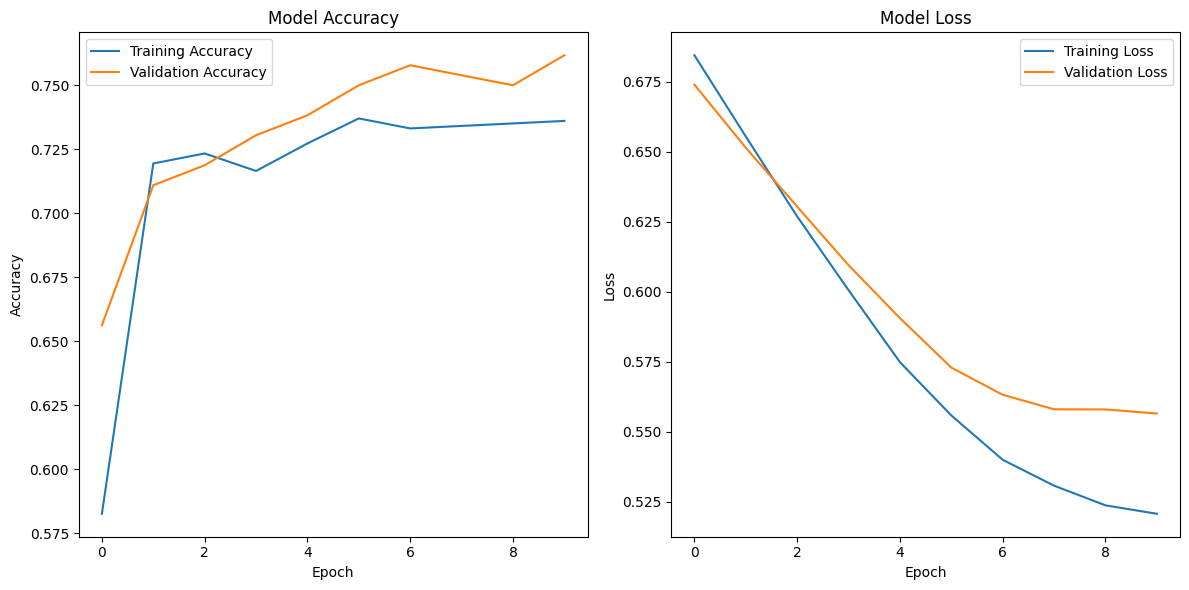

In [20]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Q16. Evaluate the model's performance using the test dataset and report relevant metrics.

In [21]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_scaled, y_test_encoded)

# Print the test loss and accuracy
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


10/10 [==============================] - 1s 7ms/step - loss: 0.5213 - accuracy: 0.7500
Test Loss: 0.5213141441345215
Test Accuracy: 0.75
